# Kapitel 4 - Statistik für Messdaten

## Lernziele

Konzeptionell:
- [ ] Konzept erklären: QQ-Plot und Normal-Plot
- [ ] entscheiden, ob ein Datensatz einer Normalverteilung folgt
- [ ] Konzept erklären: Maximum Likelihood Method & Momentenmethode zur Parameterschätzung
- [ ] Anwenden: Maximum Likelihood Method für Parameterschätzung einer beliebigen Verteilungsfamilie
- [ ] Anwenden: $z$- sowie $t$-Test für eine Messreihe durchführen, von Hand und mittels Computer (bei einseitiger nud zweiseitger Alternativhypothese)
- [ ] Erklären: Unterschied zwischen gepaarten / ungepaarten Stichproben
- [ ] Anwenden: Geeigneten Hypothesentest für gepaarte / ungepaarte Stichproben durchführen
- [ ] Konzept erklären: p-Value
- [ ] Anwenden: p-Value für einen Datensatz und bei formulierter Hypothese berechnen
- [ ] Konzept erklären: Bootstrapping im Zusammenhang mit Parameterschätzung
- [ ] Konzept erklären: Vertrauensintervall, und zwar sowohl mit Hilfe der auf dem Hypothesentest beruhenden Definitionen und mit Hilfe von Bootstrapping
- [ ] p-Wert und das Vertrauensintervall für den Testentscheid zu verwenden

Computer-basiert:
- [ ] QQ- und Normalenplot für eine Messreihe mit `probplot()` erzeugen
- [ ] $t$-Test für eine Messreihe mit `st.ttest_lsamp()` durchführen
- [ ] Vertrauensintervall mit Hilfe von `t.interval()` berechnen
- [ ] Vorzeichentest & Wilcoxon-Test für Messreihe und Hypothese mit `st.binom_test()` resp. `st.wilcoxon()` durchführen
- [ ] $t$-Test und Mann-Whitney-U Hypothesentest für gepaarte / ungepaarte Stichproben und Hypothesen mit `st.ttest_ind()` resp. `st.mannwhitneyu` durchführen


# (Normal-) Verteilungsannahme überprüfen

In der Praxis kann einer Messreihe oder Datenset die Verteilungsfamilie selten direkt zugeordnet werden. Deshalb muss man, basierend auf den vorliegenden Daten, sich für eine Verteilung entscheiden mit welcher man ein Zufallsereignis modellieren möchte.

Q-Q-Plots ist eine graphische Darstellung, mit welcher man überprüfen kann wie gut eine Verteilungsfamilie zu einem Datensatz passt. 

## Quantil-Quantil-Plot (Q-Q-Plot)

> In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. First, the set of intervals for the quantiles is chosen. A point $(x, y)$ on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the number of the interval for the quantile. - Wikipedia

> The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.
A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. Here’s an example of a Normal Q-Q plot when both sets of quantiles truly come from Normal distributions. - https://data.library.virginia.edu/understanding-q-q-plots/

Die Idee des Q-Q-Plot (Quantil-Quantil Plot) besteht darin, die empirischen Quantile gegen die theoretischen Quantile der vermuteten Modell-Verteilung zu plotten.

- [ ] TODO: Warum $-0.5$?
- [ ] TODO: Theoretische Definition dokumnetieren

### Beispiel 4.1.1 - Betondruckfestigkeit

Es liegt eine Messreihe von Betondruckfestigkeit vor ($n = 20$). Wir *vermuten* dabei, dass diese Messungen einer Normalverteilung folgen. Die Parameter wurden so geschätzt:
* $\mu$ entspreche dem empirischen Mittelwert ($\hat{\mu} = 32.7$)
* $\sigma$ entspreche der empirischen Standardabweichung ($\hat{\sigma} = 4.15$)

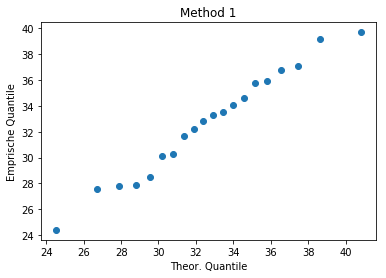

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([24.4, 27.6, 27.8, 27.9, 28.5, 30.1, 30.3, 31.7, 32.2, 32.8, 33.3,
         33.5, 34.1, 34.6, 35.8, 35.9, 36.8, 37.1, 39.2, 39.7])),
 (4.338493299839927, 32.665000000000006, 0.9923829304670189))

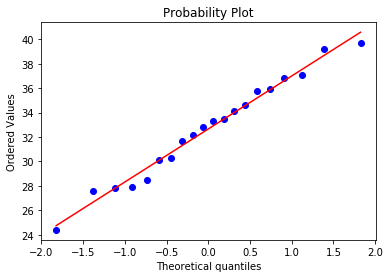

In [16]:
"""
Create a Q-Q-Plot using data from example 4.1.1

This can either be achieved by manually calculating both
quantiles and plotting them using regular matplotlib or
directly using `scipy.stats.probplot`
"""

import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from scipy.stats import norm, probplot

# Method #1: Manually
x = Series([24.4, 27.6, 27.8, 27.9, 28.5,
            30.1, 30.3, 31.7, 32.2, 32.8,
            33.3, 33.5, 34.1, 34.6, 35.8,
            35.9, 36.8, 37.1, 39.2, 39.7])

alpha_k = (np.arange(1, x.size + 1) - 0.5) / x.size

quantile_theor = norm.ppf(q=alpha_k, loc=x.mean(), scale=x.std())
quantile_empir = np.sort(x)

plt.xlabel("Theor. Quantile")
plt.ylabel("Emprische Quantile")
plt.plot(quantile_theor, quantile_empir, "o")
plt.title("Method 1")
plt.show()

# Method 2: Using probplot
x = Series([24.4, 27.6, 27.8, 27.9, 28.5,
            30.1, 30.3, 31.7, 32.2, 32.8,
            33.3, 33.5, 34.1, 34.6, 35.8,
            35.9, 36.8, 37.1, 39.2, 39.7])

probplot(x, plot=plt)

## Normal-Plot

Der normal probability plot ist ein Spezialfall von einem Q-Q-Plot. Meistens will man nicht eine spezifische Verteilung prüfen, sondern ob ein Datensatz einer Normalverteilung mit *beliebigen* $\mu$ und $\sigma$ folgt.

# 4.2 - Parameterschätzung für stetige Wahrscheinlichkeitsverteilungen

Die Verteilung des Datensatzes zur Betondruckfestigkeit kennen wir nicht. Wir haben eine Normalverteilung *vermutet* und diese Vermutung durch einen Q-Q-Plot bestätigt. Jedoch waren dazu die wahren Parameter $\mu$ und $\sigma$ immer noch unbekannt.

Die Parameterschätzung hat zum Ziel: Die wahren Parameter $\mu$ und $\sigma$ aus den Daten zu schätzen.

Es gibt dazu diverse Methoden, im Folgenden werden zwei davon vorgestellt:
* Momentenmethode
* Maximum Likelihood Methode


### Zusammenfassung

Für die beobachteten Daten wird ein **Modell** angenommen, zum Beispiel eine Normal- oder Exponentialverteilung. Dieses Modell enthält unbekannte Parameter (z.B. $\pi$ oder $\lambda$). Basierend auf den beobachteten Daten versuchen wir, diese Parameter (z.B. mit der Momementenmethode oder MLE).

**Wir versuchen also, basierend auf den beobachteten Daten, Rückschlüsse über den datengenerierenden Mechanismus zu ziehen!**

## Momentenmethode

Um die Parameter einer Verteilung zu schätzen, können wir die Momentenmethode verwenden. Bei der Momentenmethode gehen wir wie folgt vor.

1. Die Daten werden als Realisierungen von i.i.d. verteilten Zufallsvariablen mit bekannter Verteilung (z.B. Normal- oder Exponentialverteilung) aufgefasst. Die Parameter (z.B. $\lambda$ bei Exponentialverteilung) sind unbekannt.

2. Den theoretischen Erwartungswert $E(X)$ berechnen. Da dieser abhängig vom unbekannten Parameter ist, wird die Gleichung nach diesem Parameter aufgelöst.

3. Der theoretische Erwartungswert wird mit dem empirischen Pendant (empirischer Mittelwert $\bar{x}$) gleichgesetzt. Die gelöste Gleichung resultiert in einer Schätzung für den unbekannten Parameter.

**Beispiel bei der Exponentialverteilung**

Analog zu obiger Beschreibung.

1. Die Daten $x_1, x_2, ..., x_3$ sind Realisierungen der i.i.d. verteilten Zufallsvariablen $X_1, X_2, ..., X_n$

2. Der theoretische Erwartungswert der Exponentialfunktion (links) wird nach $\lambda$ aufgelöst (rechts):

$$
E(X) = \frac{1}{\lambda} \quad \Rightarrow \quad \lambda = \frac{1}{E(X)}
$$

3. Den theoretischen Erwartungswert ($E(X)$) mit dem empirischen Mittelwert gleichsetzen. Dies resultiert in einer Schätzung von $\lambda$ und wird als $\hat{\lambda}$ notiert.

$$
\hat{\lambda} = \frac{1}{\bar{x}}
$$


## Maximum-Likelihood-Methode (MLE)

> (1) Maximum likelihood estimation (or maximum likelihood) is the name used for a number of ways to guess the parameters of a parametrised statistical model. These methods pick the value of the parameter in such a way that the probability distribution makes the observed values very likely.

> (2) The goal of maximum likelihood is to find the optimal way to fit a distribution to the data.

Gemäss (2) soll man mittels MLE die beste Verteilung (resp. deren Parameter) zu einem gegebenen Dataset finden. Die Likelihood beschreibt dabei die Wahrscheinlichkeit, bestimmte Ereignisse beobachtet zu haben. Diese Likelihood wird in der MLE maximiert, sodass die Verteilung möglichst zu den beobachteten Werten passt.

Dies ist notwendig, da es in der Regel einfacher ist mit einer Verteilung zu rechnen. Kurz zusammengefasst, hilft MLE diese Frage zu beantworten:
> Welches sind die besten Parameter / Koeffizienten für mein Modell?

Der Unterschied zwischen Likelihood ($L$) und Probability:
* Probability: Jeden Stichprobenergebnis kann eine Wahrscheinlichkeit zugewiesen werden. Alle möglichen Ergebnisse haben summiert eine Wahrscheinlichkeit von 100%.

* Likelihood: Was ist die Likelihood / Wahrscheinlichkeit, ein bestimmtes Ergebnis beobachtet zu haben.

Die Wahrscheinlichkeit entspricht der Fläche unter dem Graphen für das gesuchte Ereignis, die Likelihood eines bestimmten Events ist der Punkt auf der Gerade (also der $y$-Wert). Da die Verteilung (unterer Graph) verschoben werden kann, muss die Position (Parameter) für die vorliegenden Daten optimiert werden, sodass sie am besten passt. Dies erfolgt durch Ableiten der Likelihood-Methode und danach Null setzen, um das Maximum zu finden.

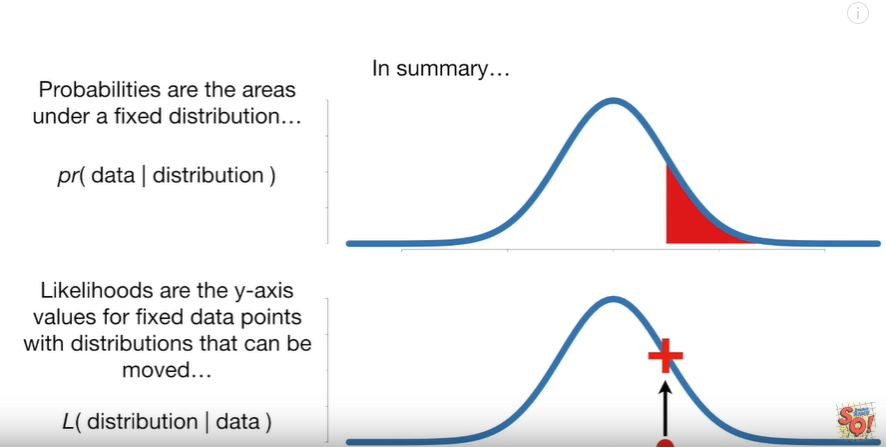

**Ressourcen**
* StatQuest Intro: https://www.youtube.com/watch?v=XepXtl9YKwc
* StatQuest Example: https://www.youtube.com/watch?v=cDlNsHUBmw4

### MLE bei diskreten Verteilungen

Bei $n$ Münzwürfen ist die Anzahl, dass die Münze Kopf zeigt, so verteilt:

$$
X \sim Bin(n, \pi)
$$

Bei $n = 100$ Würfen zeigte die Münze 58 Mal auf dem Kopf. Die Zufallsvariable $X$ nimmt also den Wert 58 an. Nun müssen wir einen möglichst guten Wert für den Parameter $\pi$ der Verteilung $Bin(n, \pi)$ finden.

## Aufgaben aus Series

### 5.3

In einer Studie wurde untersucht, wie bei Mäusen die Aufnahme von Eisen (Fe3+)
von der Dosis abhängt. Dazu wurden 54 Mäuse zufällig in 3 Gruppen zu je 18 Mäusen eingeteilt und jeweils mit Dosis hoch, mittel und tief gefüttert (hoch = 10.2 millimolar, mittel=1.2 millimolar, tief=0.3 millimolar). Mittels radioaktiver Markierung wurde der Anteil des zurückgehaltenen Eisens in Prozent nach einer gewissen Zeit bestimmt. 

a) Erstellen Sie für jede der 3 Versuchsbedingungen einen Boxplot, am besten gerade nebeneinander. Wie unterscheiden sich die Daten der verschiedenen Versuchsbedingungen?

,high,medium,low
count,18.000000,18.000000,18.00000
mean,3.698889,8.203889,11.75000
std,2.030870,5.447386,7.02815
min,0.710000,2.200000,2.25000
25%,2.420000,4.320000,6.10250
50%,3.475000,5.965000,9.98000
75%,4.472500,11.182500,15.99750
max,8.240000,18.590000,29.13000


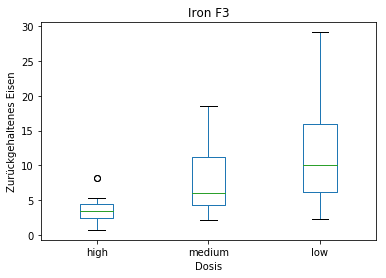

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/ironF3.dat", sep=" ", index_col=False)

data.plot(kind="box")
plt.title("Iron F3")
plt.xlabel("Dosis")
plt.ylabel("Zurückgehaltenes Eisen")
data.describe()

b) Transformieren Sie alle Werte mit dem Logarithmus und erstellen Sie wieder die
3 Boxplots wie bei Aufgabe a). Was hat sich durch die Transformation geändert?

,high,medium,low
count,18.000000,18.000000,18.000000
mean,1.160924,1.901225,2.279981
std,0.585477,0.658512,0.656311
min,-0.342490,0.788457,0.810930
25%,0.883768,1.459914,1.806066
50%,1.244466,1.784766,2.299117
75%,1.497890,2.406280,2.771398
max,2.109000,2.922624,3.371769


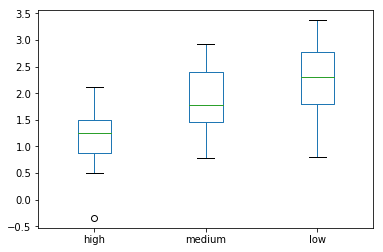

In [36]:
import numpy as np

transformed = np.log(data)
transformed.plot(kind="box")
transformed.describe()


In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)

probplot(data["medium"], plot=axs[0])
plt.title("Normalplot with original data")

probplot(transformed["medium"], plot=axs[1])
plt.title("Normalplot with log-transformed data")

Unter der Annahme, dass die Daten bei mittlerer Dosis normalverteilt sind,
schätzen Sie die Parameter µ und $\sigma^2$. Wie gross ist die Wahrscheinlichkeit, dass eine Maus mehr als 10 % Eisen zurückhält?


In [73]:
from scipy.stats import norm

mean = data["medium"].mean()
var = data["medium"].var()

# P(X > 10) = 1 - P(X <= 10)
1 - norm.cdf(x=10, loc=mean, scale=np.sqrt(var))

0.37080583780045573

# 4.3 Statistische Tests und Vertrauensintervall für eine Stichprobe bei normalverteilen Daten

## Problemstellung

Beispiel: Sie stellen eine Maschine her und müssen sich auf die Spezifikationen des Herstellers der Bestandteile verlassen können. Wie können Sie feststellen, dass die Bestandteile die Spezifikationen auch erfüllen?

**Beispiel 1**: Hersteller einer Abfüllmaschine behauptet, dass die Maschine die Büchsen normalverteilt mit $\mu = 500ml$ und $\sigma = 1ml$ abfüllt. Dazu macht die Brauerei 100 Stichproben, derem Mittelwert jedoch $449.57 ml$ beträgt.

Das ist weniger als 500ml, aber liegt dies noch innerhalb der Angaben $\mu = 500ml$ und $\sigma = 1ml$ des Herstellers? Wie können wir dies überprüfen?

**Beispiel 2**: Anfrage beim Bundesamt für Statistik: Durchschnittliche
Körpergrösse der erwachsenen Frauen liegt in der Schweiz bei 180 cm mit einer Standardabweichung von 10 cm. Angabe ist gefühlsmässig wohl falsch, da viel zu hoch Wie können wir dies aber mathematisch überprüfen und begründen,
ohne uns auf unser Gefühl zu verlassen?


## Hypothesentest

> Hypothesentest sind ein wichtiges, statistisches Mittel um zu entscheiden ob eine Messreihe zu einer gewissen Grösse "passt".

### Ziel

* Standardisiertes, reproduzierbares Verfahren, mit dem wir entscheiden können ob der Mittelwert einer Messreihe zu einem bestimmten "wahren" Mittelwert $\mu$ passt oder nicht
* Achtung: Das Verfahren liefert niemals einen Beweis, dass beispielsweise eine Grösse nicht zu einer Messreihe passt
* Wir können mit statistischen Mitteln nur zeigen, dass diese Grösse mit grosser Wahrscheinlichkeit nicht zu dieser Messreihe passt

### Nullhypothese $H_0$ und Alternativhypothese $H_a$

Die Nullhypothese ist die *"No news here"*-Hypothese. Sie besagt i.d.R. dass es keine Änderungen gab und der Sachverhalt so ist, wie man es bis anhin vermutet hat (z.B. was eine Studie oder Artikel sagt). Die Alternativhypothese geht davon aus, dass sich etwas geändert hat (z.B. eine Vermutung, eine Befürchtung, etc).

Die Nullhypothese besteht meistens aus einem $=$ Operator, denn es geht davon aus, dass sich nichts geändert hat. Die Alternativhypothese arbeitet oft mit $\gt \text{ resp } \ge$ oder $\lt \text{ resp } \le$ oder $\ne$.

**Wichtig**: Hypothesen werden immer für die Population gestellt, nicht für ein spezifisches Sample.

#### Beispiel 1

Eine Studie besagt, dass 10% der Studenten gerne Java programmieren. An einer Schule wird dies gemessen, und ganze 15% sagen dass sie gerne Java programmieren. Sie vermuten also, dass der reale Wert über 10% liegen muss.

* Die Nullhypothese lautet dann ($p$ ist die Anzahl Java-Lovers): $p = 10\%$
* Alternativhypothese: $p \gt 10\%$

#### Beispiel 2

Eine Bar hat einen neuen Drink-Roboter installiert. Der Roboter soll gemäss Angaben $530 \text{mL}$ an Flüssigkeit ausgeben. Der Barbesitzer *vermutet* jedoch, dass der Roboter *durchschnittlich* mehr ausgibt als er sollte. Deshalb nimmt er 30 Proben um zu prüfen, ob der mittlere Wert der Flüssigkeit *signifikant* grösser als $530 \text{mL}$ ist.

* $H_0: \mu = 530 \text{mL}$
* $H_a: \mu \gt 530 \text{mL}$

### Beispiel 4.3.8
 
Die Grundidee ist, mit einer beobachteten Messreihe zu überprüfen, ob unter der Annahme µ = 80 der Mittelwert dieser Messreihe wahrscheinlich ist oder nicht. Wir wählen dazu eine Messreihe der Länge 6 aus und gehen von folgendem Modell
aus.

In [75]:
# Beispiel 4.3.2
"""
Wir schätzen die Parameter \mu und \sigma der Methode A
"""
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

methodeA = Series([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04,
                   79.97, 80.05, 80.03, 80.02, 80.00, 80.02])

print("Mean:", methodeA.mean())
print("Std:", methodeA.std())


Mean: 80.02076923076923
Std: 0.023965787580611863


In [78]:
"""
Example: 4.3.3

Simulate a new Series by assuming the hypothesis is true:
The data follows a normal distribution with their parameters \mu = 80
and var=0.02^2 (as computed above).
"""
from scipy.stats import norm
np.random.seed(1) # keeps randomness fixed

methodeA_simulation1 = norm.rvs(size=6, loc=80, scale=0.02)
methodeA_simulation1 = Series(np.round(methodeA_simulation1, 2))

print("Mean:", methodeA_simulation1.mean())
print("Std:", methodeA_simulation1.std())

Mean: 79.99333333333333
Std: 0.028751811537128993


In [80]:
"""
Example: 4.3.3

Simulate a new Series by assuming the hypothesis is true:
The data follows a normal distribution with their parameters \mu = 80
and var=0.02^2 (as computed above).
"""
from scipy.stats import norm
np.random.seed(17) # keeps randomness fixed

for i in range(5):
    methodeA_simulation1 = norm.rvs(size=6, loc=80, scale=0.02)
    methodeA_simulation1 = Series(np.round(methodeA_simulation1, 2))

    print("Mean:", methodeA_simulation1.mean())
    print("Std:", methodeA_simulation1.std())
    print(8 * "-")

Mean: 80.01
Std: 0.02683281573000061
--------
Mean: 80.00666666666667
Std: 0.019663841605006817
--------
Mean: 79.99166666666666
Std: 0.027868739954775196
--------
Mean: 79.99499999999999
Std: 0.016431676725153874
--------
Mean: 79.99166666666667
Std: 0.013291601358250573
--------


### p-Wert

> Given the null hypothesis is true, a p-value is the probability of getting a result as or more extreme than the sample result by random chance alone.

Der P-Value stellt die Wahrscheinlichkeit dar, ein bestimmtes Ereigniss unter der Annahme, dass die Nullhypothese stimmt, beobachtet zu haben.

Nehmen wir das vorherige Beispiel: Angenommen der Mittelwert dieser Messung betrage $\mu = 534 \text{mL}$. Dann ist der P-Wert die Wahrscheinlichkeit, dies unter der Annahme von $H_0$ beobachtet zu haben.

Es handelt sich also um die bedingte Wahrscheinlichkeit:

$$
P(\mu \ge 534 \text{mL} | H_0 \text{ is true})
$$

Wie gross ist die Wahrscheinlichkeit, einen Wert für $\mu \ge 534$ zu erhalten, wenn wir davon ausgehen, dass die Nullhypothese $H_0$ stimmt.

Die resultierende Wahrscheinlichkeit wird gegen das Signifikanzniveau $\alpha$ verglichen:
* $\text{p-Value} \lt \alpha$: Wird $H_0$ verworfen, es gibt Hinweise dass $H_a$ gilt
* $\text{p-Value} \ge \alpha$: Kann $H_0$ nicht verworfen werden



## z-Test

> Der Gauß-Test oder Z-Test ist in der mathematischen Statistik eine Gruppe von Hypothesentests mit standardnormalverteilter Testprüfgröße unter der Nullhypothese. 
>
> Mit dem Gauß-Test werden anhand von Stichproben-Mittelwerten Hypothesen über die Erwartungswerte derjenigen Grundgesamtheiten geprüft, aus denen die Stichproben stammen.
>
> Der Gauß-Test folgt einer ähnlichen Methode wie der t-Test. Der wichtigste Unterschied liegt in den Voraussetzungen für die Anwendung dieser Tests: Während der t-Test mit den empirischen Standardabweichungen der Stichproben arbeitet, müssen für den Gauß-Test die Standardabweichungen der Grundgesamtheiten bekannt sein. Des Weiteren verwendet der Gauß-Test grundsätzlich die Standardnormalverteilung als Kennwerteverteilung, während der t-Test auf die t-Verteilung zurückgreift. Somit ist der Gauß-Test für kleine Stichproben nur bedingt geeignet. - [Wikipedia](https://de.wikipedia.org/wiki/Gau%C3%9F-Test)

Um einen z-Test durchführen zu können, muss $\sigma_X$ bekannt sein. Das $\mu$ ist aus der Hypothese bekannt und wird gegen die empirischen Mittelwerte der Stichprobe geprüft.

### z-Test durchführen

### z-Test durchführen (standardisiert)

> Unter Standardisierung (in einführenden Statistikkursen wird sie manchmal als z-Transformation bezeichnet[1]) versteht man in der mathematischen Statistik eine Transformation einer Zufallsvariablen, so dass die resultierende Zufallsvariable den Erwartungswert null und die Varianz eins besitzt. Die Standardabweichung entspricht der Wurzel der Varianz und ist somit auch gleich eins. Die standardisierte Zufallsvariable wird häufig z-Score bzw. z-Wert genannt und bildet ein Fundament zur Konstruktion statistischer Tests.


## Fehler 1. und 2. Art beim statistischen Test

> Die Fehler 1. und 2. Art, auch $\alpha$-Fehler und $\beta$-Fehler genannt, bezeichnen eine statistische Fehlentscheidung beim Testen von Hypothesen. Beim Test einer Hypothese liegt ein Fehler 1 Art vor, wenn die Nullhypothese zurückgewiesen wird, obwohl sie in Wirklichkeit wahr ist (beruhend auf einer zufällig erhöhten bzw. niedrigeren Anzahl positiver Ergebnisse). Dagegen bedeutet ein Fehler 2. Art, dass der Test die Nullhypothese fälschlicherweise nicht zurückweist, obwohl die Alternativhypothese korrekt ist. Fehler 1. und 2. Art werden in der statistischen Qualitätskontrolle häufig Produzentenrisiko und Konsumentenrisiko genannt. In der Prozesskontrolle durch Qualitätsregelkarten verwendet man dafür die Begriffe blinder Alarm und unterlassener Alarm.

Zusammengefasst:
* Fehler 1. Art: $H_0$ wird fälschlicherweise verworfen, obwohl $H_0$ stimmt (falscher Alarm, false positive)
* Fehler 2. Art: $H_0$ wird fälschlicherweise angenommen, obwohl $H_a$ zutrifft (unterlassener Alarm, true negative)

Die Fehler sind dabei bedingte Wahrscheinlichkeiten:

$$
P(\text{Fehler 1. Art}) = P_{H_0}(T \in K) \equiv P_{H_0}(T \in K|\mu = \mu_0) \\
\\
P(\text{Fehler 2. Art}) = P_{H_A}(T \in \bar{K}) \equiv P_{H_A}(T \in \bar{K}|\mu = \mu_A)
$$

### Was ist wichtiger?

In der Wissenschaft ist der erste Fehler wichtiger (zum Vermeiden). Man möchte keinen Effekt publizieren, den es nicht gibt. In der Regel möchte man ja einen Effekt (Abweichung der Nullhypothese) aufzeigen.

### Rolle von $\alpha$

Umso kleiner $\alpha$ gewählt wird, umso unwahrscheinlicher wird der Fehler 1. Art. Diese beiden Fehlerarten konkurrenzieren sich jedoch: der Fehler zweiter Art wird umso wahrscheinlicher desto kleiner $\alpha$ gewählt ist.

Die Wahl von $\alpha$ steuert also einen Kompromiss zwischen Fehler 1. und 2. Art. Weil man aber primär einen Fehler 1. Art vermeiden will, wählt man α klein, z.B. α = 0.05. Je kleiner $\alpha$, desto kleiner der Verwerfungsbereich. Die vertikale Linie wandert also nach rechts und somit wird der Fehler 2. Art umso grösser.

## Macht eines statistischen Tests

Statt der Wahrscheinlichkeit eines Fehlers 2. Art gibt man oft die sogenannte Macht eines Tests an. Die Macht gibt die Wahrscheinlichkeit an, $H_A$ zu entdecken, falls $H_A$ richtig ist.

Sie ist definiert als:

\begin{align*} 
Macht &= 1 - P(\text{Fehler 2. Art}) \\
&= P(\text{Verwerfen von H_0 falls H_A stimmt}) \\
&= P_{H_A}(T \in K)
\end{align*}

## t-Test

> Der t-Test ist der Hypothesentest der t-Verteilung. Er kann verwendet werden, um zu bestimmen, ob zwei Stichproben sich statistisch signifikant unterscheiden. Meistens wird der t-Test (und auch die t-Verteilung) dort eingesetzt, wo die Testgröße normalverteilt wäre, wenn der Skalierungsparameter (der Parameter, der die Streuung definiert — bei einer normalverteilten Zufallsvariable die Standardabweichung) bekannt wäre. Ist der Skalierungsparameter unbekannt, wird er durch eine Schätzung aus dem Datensatz ersetzt. - [Matheguru](https://matheguru.com/stochastik/t-test.html)

Da die Standardabweichung $\sigma_X$ in der Praxis oftmals unbekannt ist, wird diese beim t-Test geschätzt:

$$
\hat{\sigma_X^2} = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X_n})^2
$$

Diese Schätzung führt jedoch wieder zu einer zusätzlichen Unsicherheit, weshalb sich die Verteilung der Teststatistik ändert:

Die Teststatistik beim t-Test ist gegeben durch:
$$
T
= \frac{\bar{X_n} - \mu_0}{\hat{\sigma}_X / \sqrt{n}}
= \frac{\text{beobachtet - erwartet}}{\text{geschätzter Standardfehler}}
$$

Deren Verteilung unter der Nullhypothese $H_0: \mu = \mu_0$ ist eine t-Verteilung mit $n-1$ Freiheitsgraden. Wir bezeichnen diese mit:
$$
t_{n-1}
$$

### $t_n$-Verteilung

Es ist eine symmetrische Verteilung im 0, ist jedoch "langschwänziger" als die Standardnormalverteilung $N(0,1)$. Es gelten folgende Kennzahlen für $Y \sim t_n$:

\begin{align*}
E(Y) &= 0 \\
Var(Y) &= \frac{n}{n-2}
\end{align*}

Für sehr grosse $n$ (insbesondere $n \rightarrow \infty$) strebt die $t_n$-Verteilung gegen die Standardnormalverteilung $N(0, 1)$.


#### Beispiel 4.3.16
TODO

#### Beispiel 4.3.17
TODO

## Vertrauensintervall für $\mu$

Da der Mittelwert $\mu$ oftmals unbekannt ist, macht man Punktschätzungen. Dabei erhält man aber nur einen einzigen Wert. Man weiss aber nicht, wie nahe dieser geschätzte Mittelwert am wahren (unbekannten) Mittelwert der Messreihe liegt.

Das Vertrauensintervall (auch Konfidenzintervall) gibt ein Intervall an, in welches der wahre Mittelwert mit einer vorgegebenen Wahrscheinlichkeit fällt.

Zwei Methoden werden hier betrachtet, mit welchem diese Intervalle bestimmt werden können:
* Bootstrapping-Verfahren: Dies macht keine Annahme über die Messdaten
* Formale Methode: Geht von einer Normalverteilung der Messdaten aus

### Bootstrapping-Verfahren

> Das Bootstrapping-Verfahren oder Bootstrap-Verfahren (selten Münchhausenmethode) ist in der Statistik eine Methode des Resampling. Dabei werden wiederholt Statistiken auf der Grundlage lediglich einer Stichprobe berechnet. Verwendung finden Bootstrap-Methoden, wenn die theoretische Verteilung der interessierenden Statistik nicht bekannt ist. 

Das Bootstrapping-Verfahren ist eine wichtige statistische Methode, die oft bei der Schätzung von Parametern von Wahrscheinlichkeitsverteilungen zur Anwendung
kommt. Der Bootstrap ersetzt in der Regel die theoretische Verteilungsfunktion $F$ einer Zufallsvariablen durch die empirische Verteilungsfunktion (relative Summenhäufigkeitsfunktion) $\hat{F}$ der Stichprobe $x_1, ..., x_n$.

Die Grundidee ist, dass aus einer Messreihe durch Resampling (Stichproben aus dieser Messreihe) neue Messreihen simuliert werden.

Als Beispiel sei eine Methode B zur Erhebung der Schmelzwärme gegegeben, sie hat folgende Werte aufgezeichnet:
$$
80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97
$$

Diese Messreihe folgt einer unbekannten Verteilung und hat einen unbekannten Erwartungswert $\mu$. Wir nennen die unbekannte Verteilung $F$, wobei wir den Mittelwert $\bar{x}$ der Messreihe als Punktschätzung von $\mu$ betrachten können. Aber wie gut ist diese Schätzung?

Indem wir die unbekannte Verteilung $F$ durch das (wiederholte) Erzeugen von Datensätzen simulieren und jeweils die Mittelwerte dieser simulierten Datensätze bestimmen, können wir die Verteilung des empirischen Mittelwertes und damit ein Vertrauensintervall für den wahren Mittelwert konstruieren. Dies ist die Idee von Bootstrapping.

Siehe auch: https://www.youtube.com/watch?v=655X9eZGxls&

#### Empirische Verteilung von Daten

Die empirische Verteilung der Daten ist diejenige Verteilung, die wir in den Daten tatsächlich beobachten. Als Beispiel wurde ein 8-seitiger (fairer) Würfel 10 mal gewürfelt. Folgende Werte ergaben sich (sortiert in aufsteigender Reihenfolge):

$$
1, 1, 2, 3, 3, 3, 3, 4, 7, 7
$$

Die Zahlen werden einzelnen auf Post-Its geschrieben und in einen Hut gelegt. Damit ergibt sich eine Wahrscheinlichkeitsverteilung (z.B. eine 3 hat die Wahrscheinlichkeit von $\frac{4}{10}$. Das Post-It wird danach wieder zurückgelegt.

Damit ergibt sich folgende Wahrscheinlichkeitsverteilung für die Zufallsvaraible $X$:

| x | 1 | 2 | 3 | 4 | 7 |
|---|---|---|---|---|---|
|P(X=x) | 2/10 | 1 / 10 | 4 / 10 | 1 / 10 | 2 / 10 |

Die Daten haben eine unbekannte Verteilung $F$, die empirische Verteilung dazu bezeichnen wir als $F*$. Ist die Datenmenge gross, so sollte nach dem Satz von Glivenko-Cantelli F∗ gegen F konvergieren.

Zur Illustration sind unten ebenfalls die *wahre* Verteilung des Würfelexperiments aufgeführt:

| x | 1 | 2 | 3 | 4 | 5 | 6 |  7 |
|---|---|---|---|---|---|---|---|
| wahres P(X=x) | 1/8 |  1/8 |  1/8 |  1/8 |  1/8 |  1/8 |  1/8 |
| empirisches P(X=x) | 2/10 | 1 / 10 | 4 / 10 | 0 | 0 | 1 / 10 | 2 / 10 |

#### Resampling

> Resampling (engl.) bzw. Stichprobewiederholung bezeichnet die Bestimmung der statistischen Eigenschaften von Stichprobenfunktionen, wie Schätzern oder Testgrößen auf Basis einer wiederholten Ziehung von Stichproben, sogenannten Unterstichproben, aus einer Ausgangsstichprobe. Die Stichprobenfunktion wird auf Basis der gezogenen Unterstichproben wiederholt berechnet[1] und anhand der Ergebnisse ihre Verteilungseigenschaften untersucht. - [Wikipedia](https://de.wikipedia.org/wiki/Resampling)

Der wesentliche Schritt beim Bootstrapping-Verfahren ist das Resampling. Dabei wird aus den Daten selbst wieder eine Stichprobe gezogen (mit Zurücklegen).


BeimWürfelbeispiel hatten wir die 10 Datenpunkte:
$$
1, 1, 2, 3, 3, 3, 3, 4, 7, 7
$$
Wir betrachten dies als Stichprobe (sample), die aus einer zugrundeliegenden Verteilung stammt. Beim Resampling werden nun die Papierstreifen in einen Hut gelegt, zufällig gezogen und wieder zurückgelegt. Machen wir dies fünfmal, so erhalten wir eine Stichprobe der Stichprobe (Resampling) und erhalten zum Beispiel die Werte
$$
3, 2, 3, 3, 1
$$
Da wir die mit den Zahlen beschrifteten Streifen wieder zurücklegen, können Zahlen mehrfach erscheinen. Bezeichnen wir die ursprünglichen Datenpunkte mit $$
x_1, x_2, . . . , x_n
$$

so bezeichnen wir die durch Resampling erzeugten Datenpunkte der Länge m mit einem Stern:
$$
x_1^{*},x_2^{*}, ..., x_m^{*}
$$

Entsprechend ist $\bar{x}$ der Mittelwert der ursprünglichen Stichprobe oder Messreihe und
$\bar{x}^{∗}$ der Mittelwert der Daten, die wir durch Resampling erhalten haben.

#### Empirische Bootstrap-Stichprobe

Nehmen wir an, wir haben $n$ Datenpunkte $x_1, x_2, . . . , x_n$, die einer (unbekannten) Verteilung $F$ folgen. Eine empirische Bootstrap-Stichprobe ist eine durch Resampling erzeugte Stichprobe derselben Länge $n$.

Da der Standardfehler von der Länge der Messreihe abhängt, wird eine durch Resampling gewählte Stichprobe mit derselben Länge gewählt.

Somit können wir $\sigma$ durch $\sigma*$ approximieren (schätzen). Dies werden wir benutzen, um das Vertrauensintervall zu konstruieren

#### Beispiel 4.4.5

TODO Beispiel erklären

Resampling in Python:

Die Idee des Bootstrapping-Verfahrens ist nun, dass dieses Resampling sehr oft durchgeführt wird, um die Streuung von
$$
\mu \approx \bar{x}
$$
abzuschätzen, wobei 79.98 der Durchschnitt der ursprünglichen Messreihe war. 

In [95]:
import numpy as np
np.random.seed(1)

methodeB = np.array([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])
print("Arithm. Mittel von Methode B:", methodeB.mean())

# length of data set
n = methodeB.size
# number of bootstrap samples
nboot = 1

# Bootstrap sample from dataset is generated by randomly choosing
# and putting back (replace=True)
bootstrap_sample = np.random.choice(methodeB, n * nboot, replace=True)

print("Got bootstrap sample:", bootstrap_sample)
print("Mean of bootstrap sample:", bootstrap_sample.mean())




Arithm. Mittel von Methode B: 79.97874999999999
Got bootstrap sample: [80.03 79.97 79.97 80.02 79.97 79.94 79.97 80.03]
Mean of bootstrap sample: 79.9875


Als nächstes möchten wir ein 95%-Bootstrap-Vertrauensintervall für das wahre $\mu$ angeben. Die Schätzung von $\mu$ für unsere ursprüngliche Testreihe ist:
$$
\mu \approx \bar{x} = 79.98
$$

Nun erzeugen wir 20 Bootstrap-Stichproben, alle mit der Länge 8:

In [103]:
import numpy as np
np.random.seed(1)

methodeB = np.array([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])

# 20 bootstrap samples
nboot = 20
n = methodeB.size

bootstrap_sample = np.random.choice(methodeB, n*nboot, replace=True)
# Divide data into 8 arrays of length 20
# See skript page 188 for this, it is inverted...
bootstrap_sample_array = np.reshape(bootstrap_sample, (n, nboot))

xbarstar = bootstrap_sample_array.mean(axis=0)
print(np.sort(xbarstar))

[79.96375 79.965   79.96625 79.96875 79.97125 79.97375 79.97625 79.9775
 79.97875 79.98    79.98125 79.98125 79.9825  79.9825  79.98375 79.985
 79.985   79.9875  79.99    79.99375]


Beim95%-Bootstrap-Vertrauensintervall wählenwir die „mittleren” 95%dieser Daten. Diese werden durch die 2.5%- und 97.5%-Quantile begrenzt.

In [104]:
d = np.percentile(xbarstar, q=[2.5, 97.5])
print("Vertrauensintervall:", d)

Vertrauensintervall: [79.96434375 79.99196875]


Somit lautet das 95%-Bootstrap-Vertrauensintervall dann:
$$
[79.96, 79.99]
$$

TODO: Kann jetzt gesagt werden: "Wir sind zu 95% sicher, dass der Mittelwert zwischen 79.96 und 79.99 liegt".?